# Ryan Timbrook
## Data Science 450, Spring 2017
## Date: 05/21/2017
## Assignment 4


# Data Preparation
Consider the data collected by a hypothetical video store for 50 regular customers.  
 
This data consists of a table which, for each customer, records the following attributes:  Gender  
* **Income**  
* **Age**  
* **Rentals** - Total number of video rentals in the past year  
* **Avg. per visit** - Average number of video rentals per visit during the past year
* **Incidentals** - Whether the customer tends to buy incidental items such as refreshments when renting a video
* **Genre** - The customer's preferred movie genre


Perform each of the following data preparation tasks: 
* a) Use **smoothing** by bin means to smooth the values of the Age attribute. Use a bin depth of 4.

* b) Use **min-max** normalization to transform the values of the Income attribute onto the range [0.0-1.0].

* c) Use **z-score normalization** to standardize the values of the Rentals attribute.

* d) **Discretize** the (original) Income attribute based on the following categories:  High = 60K+; Mid = 25K-59K; Low = less than $25K

* e) **Convert the original data** (not the results of parts a-d) into the standard spreadsheet format (note that this requires that you create, for every categorical attribute, additional attributes corresponding to values of that categorical attribute; numerical attributes in the original data remain unchanged).

* f) Using the standardized data set (from part e), perform **basic correlation analysis among the attributes**.

    *Discuss your results by indicating any strong correlations (positive or negative) among pairs of attributes.* You need to **construct a complete Correlation Matrix** (Please read the brief document Basic Correlation Analysis (see course website) for more detail).
    
#### Question: Can you observe any "significant" patterns among groups of two or more variables? Explain.

* g) Perform a **cross-tabulation** of the two "gender" variables versus the three "genre"  variables. 
#### Show this as a 2 x 3 table with entries representing the total counts. 
 
Then, use a graph or chart that provides the best visualization of the relationships between these sets of variables. 

#### Question: Can you draw any significant conclusions?

* h) Select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). Then, create a summary (e.g., using means, medians, and/or other statistics) of the selected data with respect to all other attributes.

#### Question: Can you observe any significant patterns that characterize  this segment of customers? Explain.  
 
**Note: To know whether your observed patterns in the target group are significant, you need to compare them with the general population using the same metrics.**  
 
* i) Suppose that because of the high profit margin, the store would like to increase the sales of incidentals. Based on your observations in previous parts discuss how this could be accomplished.

**Explain your answer based on your analysis of the data.**
#### Question: Should customers with specific characteristics be targeted? 
#### Question: Should certain types of movies be preferred?


In [247]:
# Clear objects from Memory
rm(list=ls())
# Clear Console:
cat("\014")

# Read Data Source
read.data = function(file=file){
  read.csv(file,header = TRUE,stringsAsFactors = FALSE)
}
video.df0 = read.data('Video_Store.csv')

In [248]:
#if(!require(factoextra)){install.packages("factoextra")}
names(video.df0)
nrow(video.df0)
str(video.df0)

head(video.df0)

[1] "Cust.ID"       "Gender"        "Income"        "Age"          
[5] "Rentals"       "Avg.Per.Visit" "Incidentals"   "Genre"

[1] 50

'data.frame':	50 obs. of  8 variables:
 $ Cust.ID      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender       : chr  "M" "F" "F" "F" ...
 $ Income       : int  45000 54000 32000 59000 37000 18000 29000 74000 38000 65000 ...
 $ Age          : int  25 33 20 70 35 20 45 25 21 40 ...
 $ Rentals      : int  27 12 42 16 25 33 19 31 18 21 ...
 $ Avg.Per.Visit: num  2.5 3.4 1.6 4.2 3.2 1.7 3.8 2.4 2.1 3.3 ...
 $ Incidentals  : chr  "Yes" "No" "No" "Yes" ...
 $ Genre        : chr  "Action" "Drama" "Comedy" "Drama" ...


Cust.ID,Gender,Income,Age,Rentals,Avg.Per.Visit,Incidentals,Genre
1,M,45000,25,27,2.5,Yes,Action
2,F,54000,33,12,3.4,No,Drama
3,F,32000,20,42,1.6,No,Comedy
4,F,59000,70,16,4.2,Yes,Drama
5,M,37000,35,25,3.2,Yes,Action
6,M,18000,20,33,1.7,No,Action


### Data Preparation
#### Task A - Use smoothing by bin means to smooth the values of the Age attribute. Use a bin depth of 4

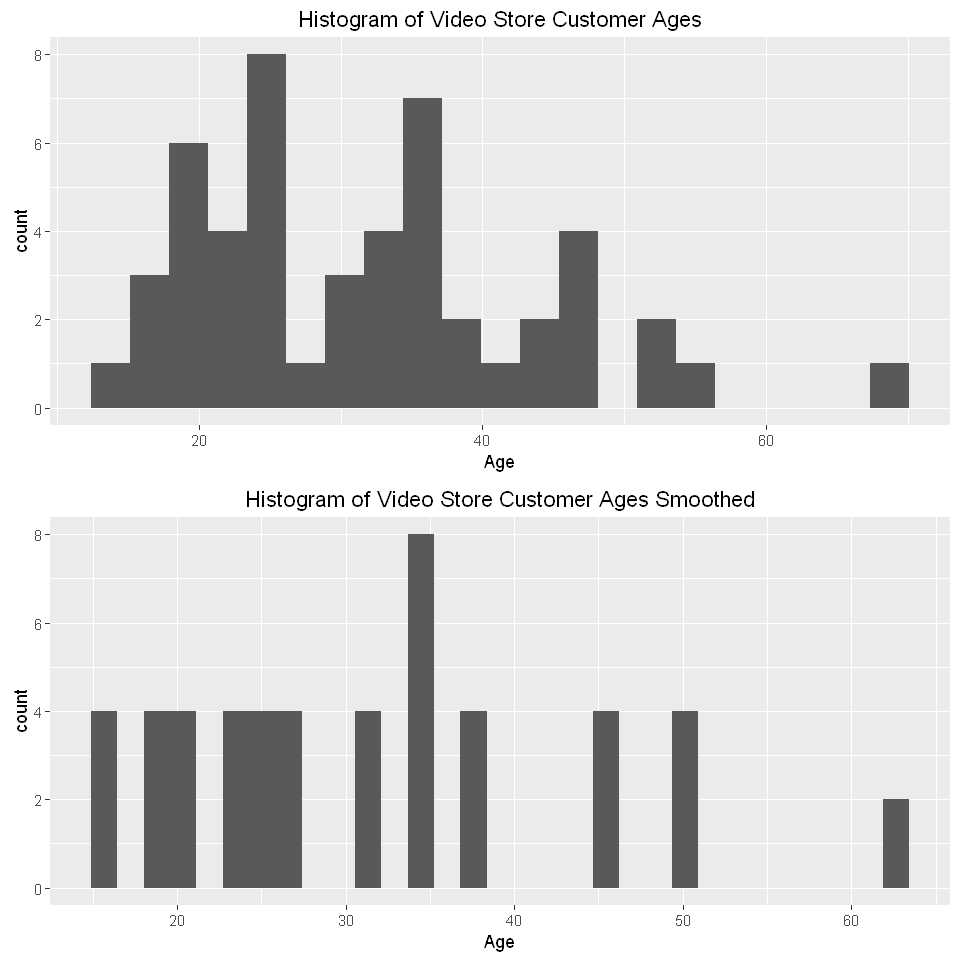

In [249]:
if(!require(taRifx)){install.packages("taRifx")}
if(!require(plyr)){install.packages("plyr")}
if(!require(dplyr)){install.packages("dplyr")}
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(gridExtra)){install.packages("gridExtra")}

video.df0 = sort(video.df0, f = ~ Age)
#video.df0
n = 4
nr = nrow(video.df0)
video.df0.s1 = split(video.df0, rep(1:ceiling(nr/n), each=n, length.out=nr))

for(i in 1:length(video.df0.s1)){
  video.df0.s1[[i]]$Age = round(mean(video.df0.s1[[i]]$Age),0)
}
video.df1 = ldply(video.df0.s1, data.frame)
video.df1 = select(video.df1,-.id)
  
options(repr.plot.width=8, repr.plot.height=8)
bw1 = (max(video.df0$Age) - min(video.df0$Age))/20
bw2 = (max(video.df1$Age) - min(video.df1$Age))/30
p1 = ggplot(video.df0, aes(Age)) + geom_histogram(binwidth = bw1) +
  ggtitle('Histogram of Video Store Customer Ages')
p2 = ggplot(video.df1, aes(Age)) + geom_histogram(binwidth = bw2) +
  ggtitle('Histogram of Video Store Customer Ages Smoothed')
grid.arrange(p1,p2,nrow=2)

### Data Preparation
#### Task B - Use min-max normalization to transform the values of the Income attribute onto the range [0.0-1.0].

[1] "Income Summary Data Prior to Normalization"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1000   26750   41000   42300   56750   89000 

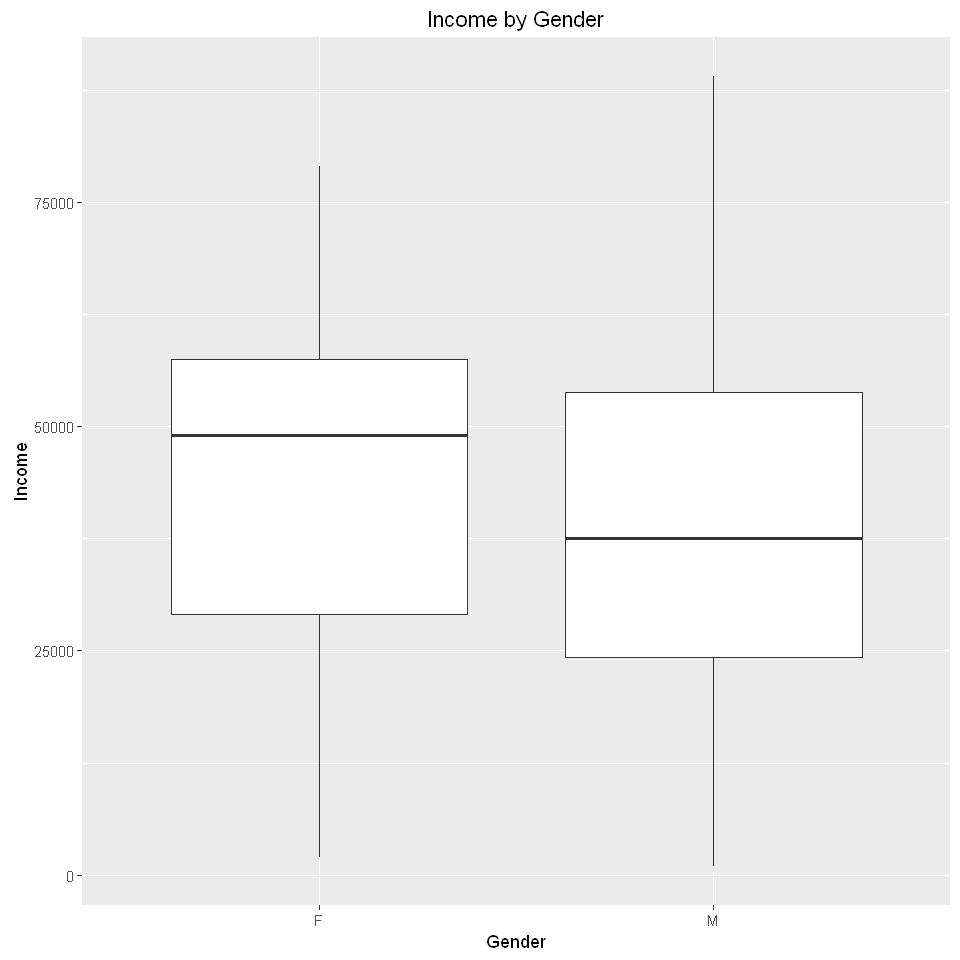

In [250]:
# Box Plot the Income Attribute Prior to Normalization
ggplot(video.df0,aes(x=factor(Gender), y=Income)) + geom_boxplot() + 
    xlab('Gender') + ggtitle('Income by Gender')
print("Income Summary Data Prior to Normalization")
summary(video.df0$Income)

[1] 0.0 0.1 0.1 0.0 0.2 0.2 0.2 0.4 0.2 0.3 0.4 0.3 0.5 0.3 0.4 0.5 0.8 0.3 0.5
[20] 0.2 0.4 0.3 0.5 0.8 0.8 0.5 0.3 0.6 0.3 0.6 0.4 0.4 0.9 0.6 0.8 0.8 0.5 0.5
[39] 0.6 0.7 0.6 0.3 0.9 1.0 0.7 0.6 0.5 0.6 0.5 0.7

[1] "Normalized Income Summary"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.300   0.500   0.472   0.600   1.000 

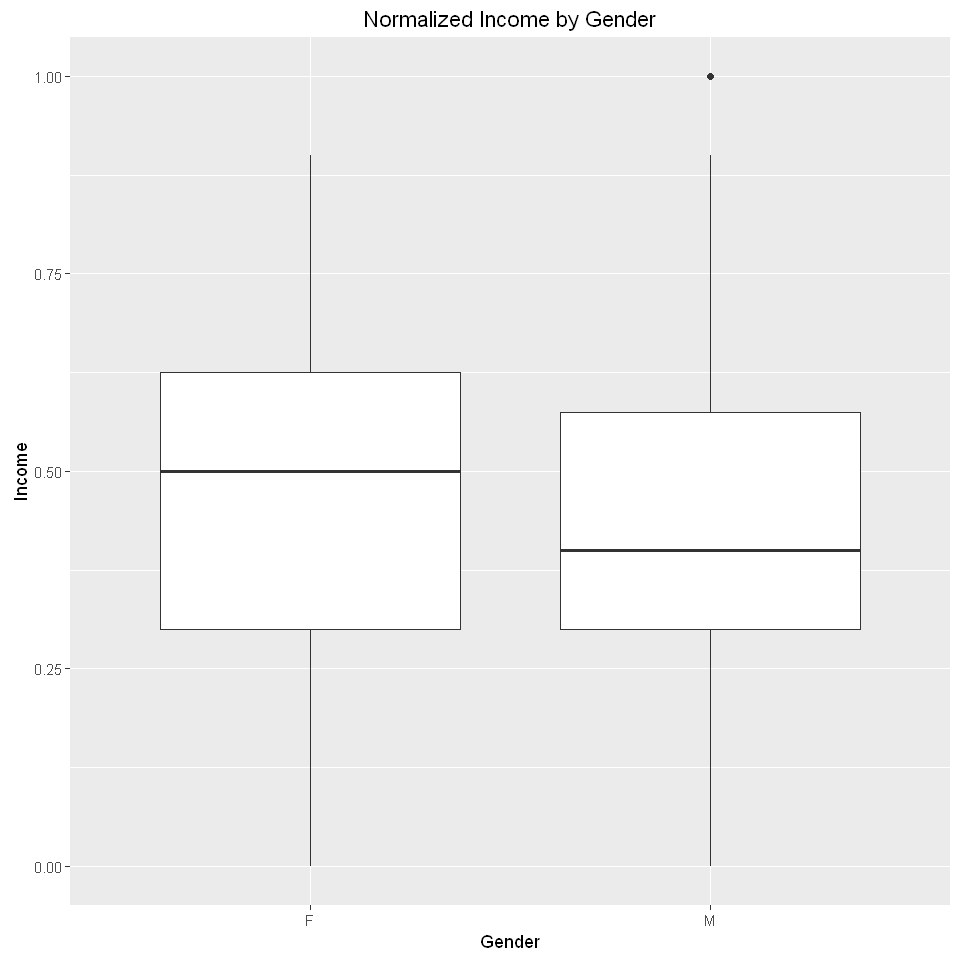

In [251]:
# Use min-max normalization to transform the values of the Income attribute onto the range [0.0-1.0].
v = video.df0$Income
income.min.max.norm = round((v - min(v)) / (max(v) - min(v)),1)
income.min.max.norm
video.df1$Income = income.min.max.norm
#str(video.df1)
print("Normalized Income Summary")
summary(video.df1$Income)

# Box Plot the Income Attribute After Normalization
ggplot(video.df1,aes(x=factor(Gender), y=Income)) + geom_boxplot() + 
    xlab('Gender') + ggtitle('Normalized Income by Gender')

### Data Preparation
#### Task C - Use z-score normalization to standardize the values of the Rentals attribute

[1] "Rental Summary Data Prior to Normalization"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   19.00   25.00   26.24   32.75   48.00 

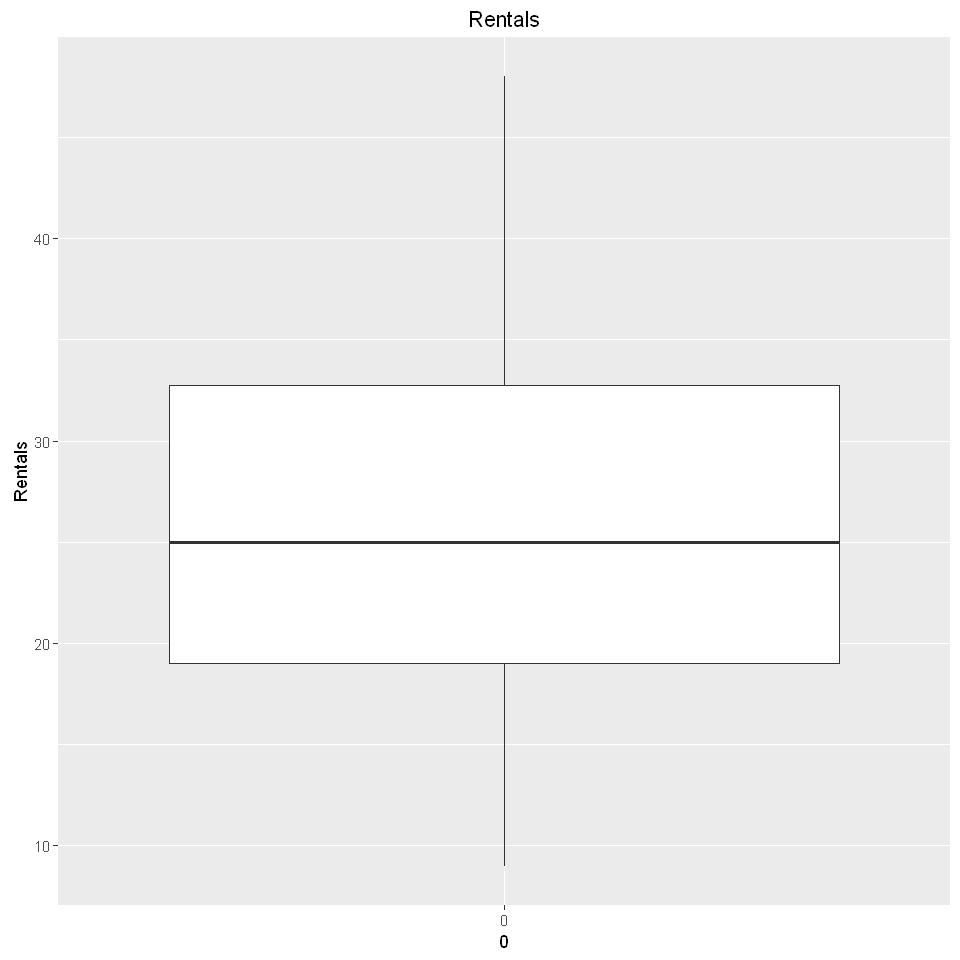

In [252]:
# Box Plot the Rental Attribute
ggplot(video.df1,aes(x=factor(0), y=Rentals)) + geom_boxplot() + 
    xlab('0') + ggtitle('Rentals')
print("Rental Summary Data Prior to Normalization")
summary(video.df1$Rentals)

[1]  0.37496378  1.27248346 -0.32310708 -0.12365827  1.07303464 -0.02393386
 [7]  0.57441259  1.57165668  0.67413700  0.67413700 -0.82172913  0.77386141
[13]  2.17000313  0.27523937 -0.22338268  0.07579055  0.47468819  1.47193227
[19] -0.92145354  0.17551496 -0.02393386  1.57165668  2.17000313  1.67138109
[25]  0.97331023 -0.52255590 -0.72200472 -1.42007558 -1.02117795 -0.92145354
[31] -0.12365827  0.17551496 -0.42283149  1.37220786 -0.72200472 -0.42283149
[37] -0.22338268 -0.62228031  0.37496378 -0.52255590 -1.71924881 -0.72200472
[43] -1.22062676 -1.42007558  0.57441259 -1.22062676 -1.51979999 -0.42283149
[49] -1.12090235 -1.02117795

[1] "Rental Summary Data z-score Normalized"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.7190 -0.7220 -0.1237  0.0000  0.6492  2.1700 

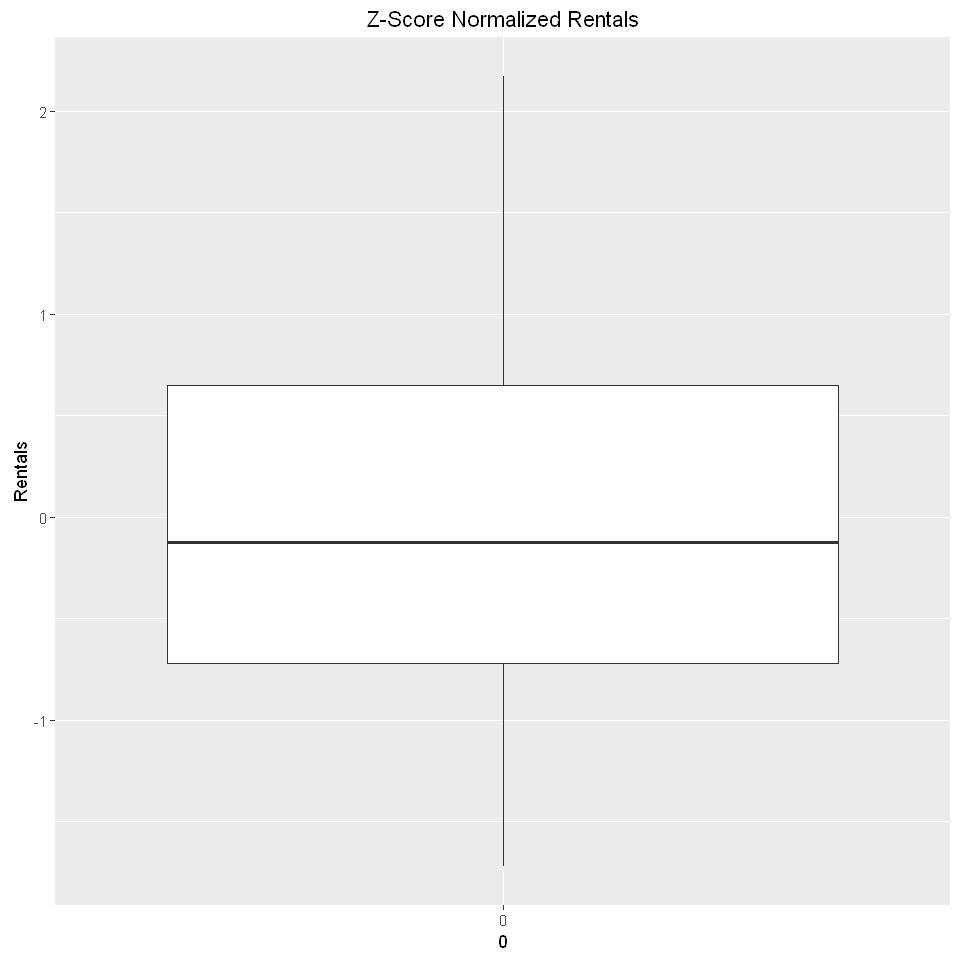

In [253]:
# Use z-score normalization to standardize the values of the Rentals attribute
v = video.df0$Rentals
rentals.z_score.norm = (v - mean(v)) / sd(v)
rentals.z_score.norm
video.df1$Rentals = rentals.z_score.norm
print("Rental Summary Data z-score Normalized")
summary(video.df1$Rentals)

ggplot(video.df1,aes(x=factor(0), y=Rentals)) + geom_boxplot() + 
    xlab('0') + ggtitle('Z-Score Normalized Rentals')

### Data Preparation
#### Task D - Discretize the (original) Income attribute based on the following categories: High = 60K+; Mid = 25K-59K; Low = less than $25K

In [254]:
video.df1$Income.DISC[video.df0$Income >= 60000] = 'High'
video.df1$Income.DISC[video.df0$Income >= 25000 & video.df0$Income <= 59000] = 'Mid'
video.df1$Income.DISC[video.df0$Income < 25000] = 'Low'
print("Frequence Table Showing The Grouping of Income Levels by Category")
table(video.df0$Income,video.df1$Income.DISC)

# Prepare Data Further
video.df1$Age.Desc[video.df0$Age >= 70 & video.df0$Age <= 87] = 'SilentG'
video.df1$Age.Desc[video.df0$Age >= 51 & video.df0$Age <= 69] = 'BabyBoomer'
video.df1$Age.Desc[video.df0$Age >= 35 & video.df0$Age <= 50] = 'GenX'
video.df1$Age.Desc[video.df0$Age >= 18 & video.df0$Age <= 34] = 'Millenial'
video.df1$Age.Desc[video.df0$Age < 18] = 'Child'
table(video.df0$Age, video.df1$Age.Desc)

[1] "Frequence Table Showing The Grouping of Income Levels by Category"


       
        High Low Mid
  1000     0   1   0
  2000     0   1   0
  6000     0   1   0
  12000    0   1   0
  15000    0   1   0
  17000    0   2   0
  18000    0   1   0
  23000    0   1   0
  24000    0   2   0
  25000    0   0   1
  26000    0   0   1
  29000    0   0   3
  31000    0   0   1
  32000    0   0   2
  35000    0   0   1
  36000    0   0   1
  37000    0   0   1
  38000    0   0   1
  41000    0   0   3
  45000    0   0   2
  47000    0   0   2
  49000    0   0   2
  50000    0   0   1
  52000    0   0   1
  54000    0   0   1
  56000    0   0   2
  57000    0   0   2
  59000    0   0   1
  62000    1   0   0
  65000    1   0   0
  68000    2   0   0
  69000    1   0   0
  74000    2   0   0
  79000    1   0   0
  83000    1   0   0
  89000    1   0   0

    
     BabyBoomer Child GenX Millenial SilentG
  15          0     1    0         0       0
  16          0     3    0         0       0
  18          0     0    0         1       0
  19          0     0    0         2       0
  20          0     0    0         3       0
  21          0     0    0         2       0
  22          0     0    0         2       0
  24          0     0    0         1       0
  25          0     0    0         7       0
  28          0     0    0         1       0
  29          0     0    0         1       0
  30          0     0    0         2       0
  32          0     0    0         1       0
  33          0     0    0         3       0
  35          0     0    6         0       0
  36          0     0    1         0       0
  38          0     0    2         0       0
  40          0     0    1         0       0
  43          0     0    1         0       0
  45          0     0    1         0       0
  46          0     0    2         0       0
  47 

### Data Preparation
#### Task E - Convert the original data (not the results of parts a-d) into the standard spreadsheet format

##### (note that this requires that you create, for every categorical attribute, additional attributes corresponding to values of that categorical attribute; numerical attributes in the original data remain unchanged).

In [255]:
print("Structer of Original Data Set")
str(video.df0)
if(!require(dummies)){install.packages("dummies")}

video.df2 = video.df0
video.df3 = video.df2
# Convert Gender categorical attribute into a numeric value

print("Gender Attribute Unique Values")
unique(video.df2$Gender)
video.df2$Gender = as.integer(ifelse(video.df2$Gender=='M',1,0))

# Convert Incedentals categorical attribute into a numeric value
print("Incidentals Attribute Unique Values")
unique(video.df2$Incidentals)
video.df2$Incidentals = as.integer(ifelse(video.df2$Incidentals=='Yes',1,0))

# Convert Genre categorical attributes into numeric representations using the dummies package
print("Genre Attribute Unique Values")
unique(video.df2$Genre)
video.df2$Genre = as.factor(video.df2$Genre)
video.df2 = dummy.data.frame(video.df2, names = c('Genre'), sep="_")
video.df2 = select(video.df2,-Cust.ID)
print("Structer of Original Data Set after converting non-numeric attributes into the spreadsheet format")
str(video.df2)
# Create a data frame using the dummies package on all categorical attributes
video.df3 = dummy.data.frame(video.df3, names = c('Gender','Incidentals','Genre'), sep="_")
print("Structer of Original Data Set after converting non-numeric attributes into the spreadsheet format using the dummies package")
video.df3 = select(video.df3,-Cust.ID)
str(video.df3)


[1] "Structer of Original Data Set"
'data.frame':	50 obs. of  8 variables:
 $ Cust.ID      : int  23 18 20 25 29 16 40 3 6 50 ...
 $ Gender       : chr  "F" "F" "M" "M" ...
 $ Income       : int  2000 6000 12000 1000 15000 17000 17000 32000 18000 24000 ...
 $ Age          : int  15 16 16 16 18 19 19 20 20 20 ...
 $ Rentals      : int  30 39 23 25 37 26 32 42 33 33 ...
 $ Avg.Per.Visit: num  2.5 1.8 2.2 1.4 2.1 2.2 1.8 1.6 1.7 4.7 ...
 $ Incidentals  : chr  "No" "Yes" "Yes" "Yes" ...
 $ Genre        : chr  "Comedy" "Action" "Action" "Comedy" ...
[1] "Gender Attribute Unique Values"


[1] "F" "M"

[1] "Incidentals Attribute Unique Values"


[1] "No"  "Yes"

[1] "Genre Attribute Unique Values"


[1] "Comedy" "Action" "Drama"

[1] "Structer of Original Data Set after converting non-numeric attributes into the spreadsheet format"
'data.frame':	50 obs. of  9 variables:
 $ Gender       : int  0 0 1 1 0 1 1 0 1 1 ...
 $ Income       : int  2000 6000 12000 1000 15000 17000 17000 32000 18000 24000 ...
 $ Age          : int  15 16 16 16 18 19 19 20 20 20 ...
 $ Rentals      : int  30 39 23 25 37 26 32 42 33 33 ...
 $ Avg.Per.Visit: num  2.5 1.8 2.2 1.4 2.1 2.2 1.8 1.6 1.7 4.7 ...
 $ Incidentals  : int  0 1 1 1 1 1 0 0 0 0 ...
 $ Genre_Action : int  0 1 1 0 1 1 1 0 1 1 ...
 $ Genre_Comedy : int  1 0 0 1 0 0 0 1 0 0 ...
 $ Genre_Drama  : int  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dummies")=List of 1
  ..$ Genre: int  8 9 10
[1] "Structer of Original Data Set after converting non-numeric attributes into the spreadsheet format using the dummies package"
'data.frame':	50 obs. of  11 variables:
 $ Gender_F       : int  1 1 0 0 1 0 0 1 0 0 ...
 $ Gender_M       : int  0 0 1 1 0 1 1 0 1 1 ...
 $ Income         : int  2000 60

### Data Preparation
#### Task F - Using the standardized data set (from part e), perform basic correlation analysis among the attributes. Construct a complete Correlation Matrix

##### Discuss your results by indicating any strong correlations (positive or negative) among pairs of attributes.
#### Output Observations:
Strong Positive Correlations:
    * Age-Income
Moderate Postive Correlations:
    * Age-Genre_Drama
Mid-Low Postive Correlations:
    * Age-Avg.Per.Visit
    * Incidentals-Genre_Action
    * Income-Avg.Per.Visit
Strong Negative Correlations:
    * No notable strong negatives
Moderate Negative Correlations:
    * Age-Rentals
    * Age-Genre_Action
Mid-Low Negative Correlations:
    * Income-Genre_Action
    * Incidentals-Genre_Comedy



Correlation is measured in a coefficent ranging from 1- to 1.
Close to 0 indicates a lack of correlation
Values closer to the boundries -1 or 1 indicate strong negative or positive correlations.
Usually strong positive or negative correlations may indicate a causal relationship between variables.

#### Question: Can you observe any "significant" patterns among groups of two or more variables? Explain.

                   Gender      Income         Age     Rentals Avg.Per.Visit
Gender         1.00000000 -0.06384100 -0.22766340 -0.02516406   -0.02917648
Income        -0.06384100  1.00000000  0.62701260 -0.27487291    0.30522080
Age           -0.22766340  0.62701260  1.00000000 -0.54961149    0.39737214
Rentals       -0.02516406 -0.27487291 -0.54961149  1.00000000    0.07030179
Avg.Per.Visit -0.02917648  0.30522080  0.39737214  0.07030179    1.00000000
Incidentals    0.19871795 -0.06384100 -0.21418422  0.29745210    0.07888455
Genre_Action   0.30357629 -0.36251415 -0.48079365  0.32605165   -0.10141359
Genre_Comedy  -0.02249606  0.07158761  0.01687164 -0.03245596   -0.06720760
Genre_Drama   -0.27783119  0.29278125  0.45637129 -0.29116962    0.15795485
              Incidentals Genre_Action Genre_Comedy Genre_Drama
Gender         0.19871795    0.3035763  -0.02249606 -0.27783119
Income        -0.06384100   -0.3625142   0.07158761  0.29278125
Age           -0.21418422   -0.4807936   0.01687

[1] "Genre_Action" "Age"

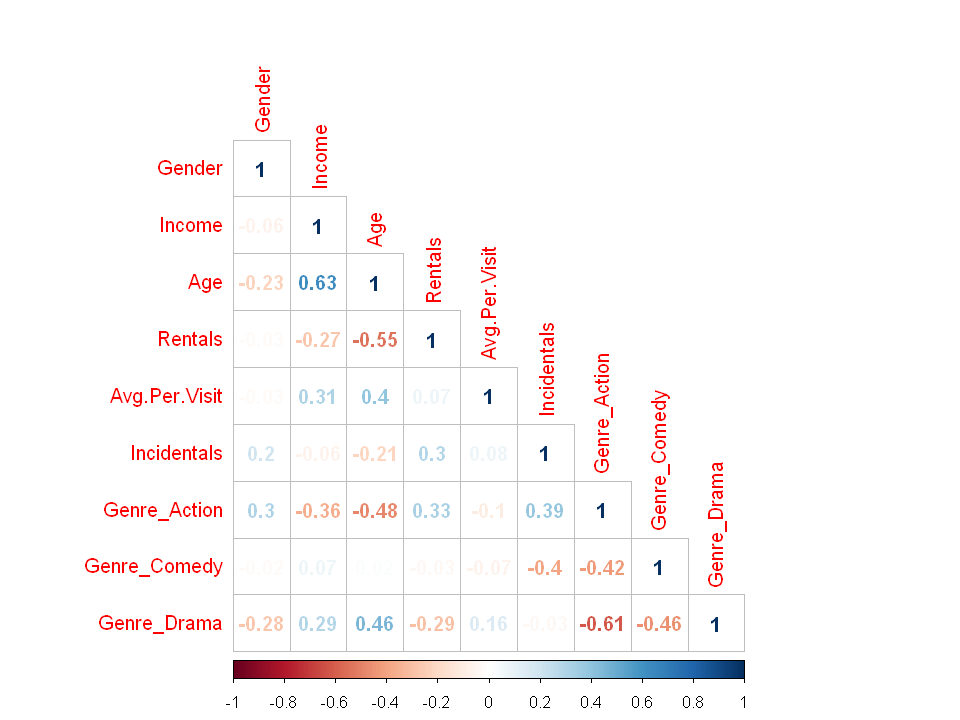

In [256]:
if(!require(corrplot)){install.packages("corrplot")}
if(!require(caret)){install.packages("caret")}
if(!require(mlbench)){install.packages("mlbench")}
options(repr.plot.height = 6, repr.plot.width = 8)
c.plot = cor(video.df2, method = 'pearson')
print(c.plot)
corrplot(c.plot, method="number", type='lower')
c.high = findCorrelation(c.plot,cutoff=0.5)
print(c.high)
colnames(video.df2[c.high])

                   Gender_F    Gender_M      Income         Age     Rentals
Gender_F         1.00000000 -1.00000000  0.06384100  0.22766340  0.02516406
Gender_M        -1.00000000  1.00000000 -0.06384100 -0.22766340 -0.02516406
Income           0.06384100 -0.06384100  1.00000000  0.62701260 -0.27487291
Age              0.22766340 -0.22766340  0.62701260  1.00000000 -0.54961149
Rentals          0.02516406 -0.02516406 -0.27487291 -0.54961149  1.00000000
Avg.Per.Visit    0.02917648 -0.02917648  0.30522080  0.39737214  0.07030179
Incidentals_No   0.19871795 -0.19871795  0.06384100  0.21418422 -0.29745210
Incidentals_Yes -0.19871795  0.19871795 -0.06384100 -0.21418422  0.29745210
Genre_Action    -0.30357629  0.30357629 -0.36251415 -0.48079365  0.32605165
Genre_Comedy     0.02249606 -0.02249606  0.07158761  0.01687164 -0.03245596
Genre_Drama      0.27783119 -0.27783119  0.29278125  0.45637129 -0.29116962
                Avg.Per.Visit Incidentals_No Incidentals_Yes Genre_Action
Gender_F      

[1] "Genre_Action"   "Age"            "Incidentals_No" "Gender_F"

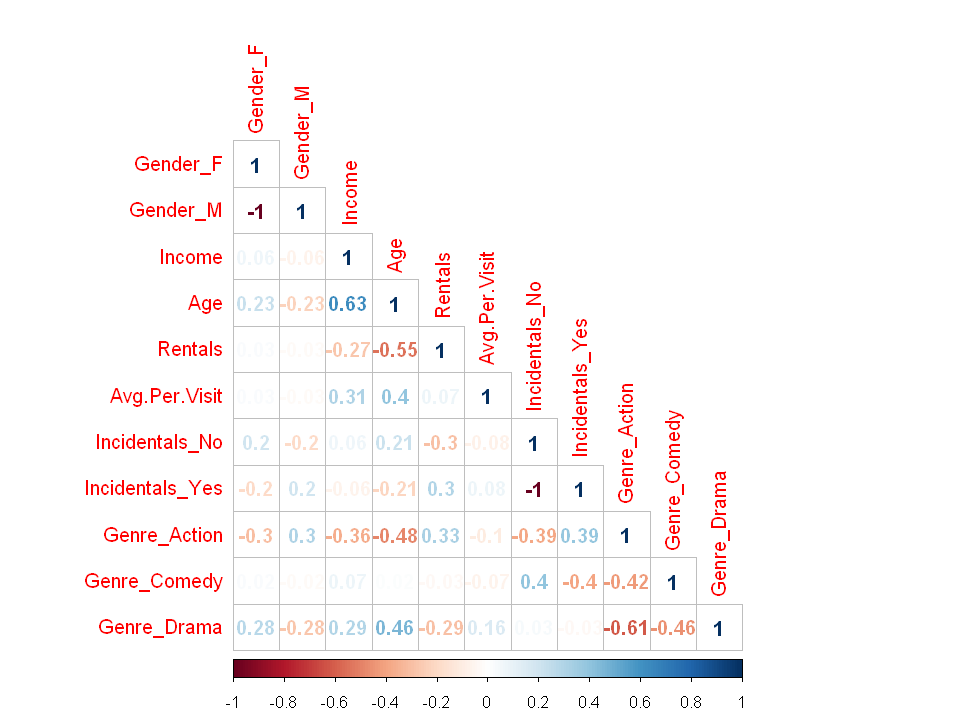

In [257]:
if(!require(corrplot)){install.packages("corrplot")}
if(!require(caret)){install.packages("caret")}
if(!require(mlbench)){install.packages("mlbench")}
options(repr.plot.height = 6, repr.plot.width = 8)
c.plot = cor(video.df3, method = 'pearson')
print(c.plot)
c.high = findCorrelation(c.plot,cutoff=0.5)
print(c.high)
colnames(video.df3[c.high])
corrplot(c.plot, method="number", type='lower')

### Data Preparation
#### Task G -  Perform a cross-tabulation of the two "gender" variables versus the three "genre" variables. 
##### Show this as a 2 x 3 table with entries representing the total counts.
##### Then, use a graph or chart that provides the best visualization of the relationships between these sets of variables.
#### Question: Can you draw any significant conclusions?
##### Men prefere Action movies while Women prefere Drama movies. They both equally enjoy comedies. 
If Gender has no effect on Movie Genre, the observed difference or more is attributed to random sampling error in 7% of the observations.

      Genre
Gender Action Comedy Drama
     F      5      6    13
     M     13      6     7

Call: xtabs(formula = ~Gender + Genre, data = video.df0)
Number of cases in table: 50 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 5.284, df = 2, p-value = 0.07122

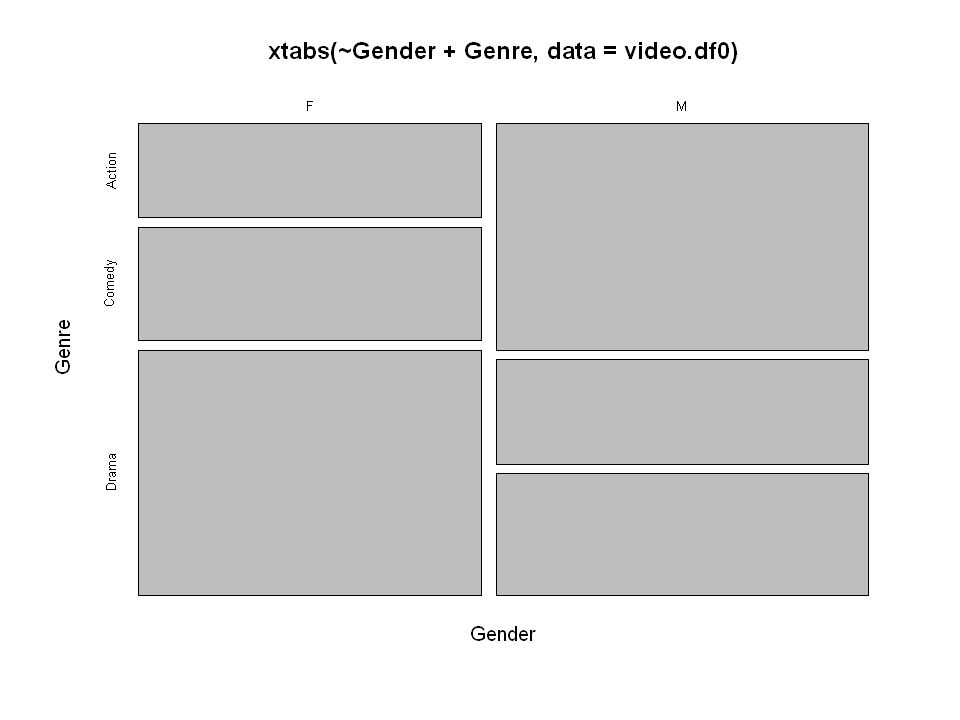

In [258]:
xtabs(~Gender + Genre, data = video.df0)
summary(xtabs(~Gender + Genre, data = video.df0))
plot(xtabs(~Gender + Genre, data = video.df0))

                  Gender Genre_Action Genre_Comedy Genre_Drama
Gender        1.00000000    0.3035763  -0.02249606  -0.2778312
Genre_Action  0.30357629    1.0000000  -0.42146362  -0.6123724
Genre_Comedy -0.02249606   -0.4214636   1.00000000  -0.4588315
Genre_Drama  -0.27783119   -0.6123724  -0.45883147   1.0000000
[1] 4


[1] "Genre_Drama"

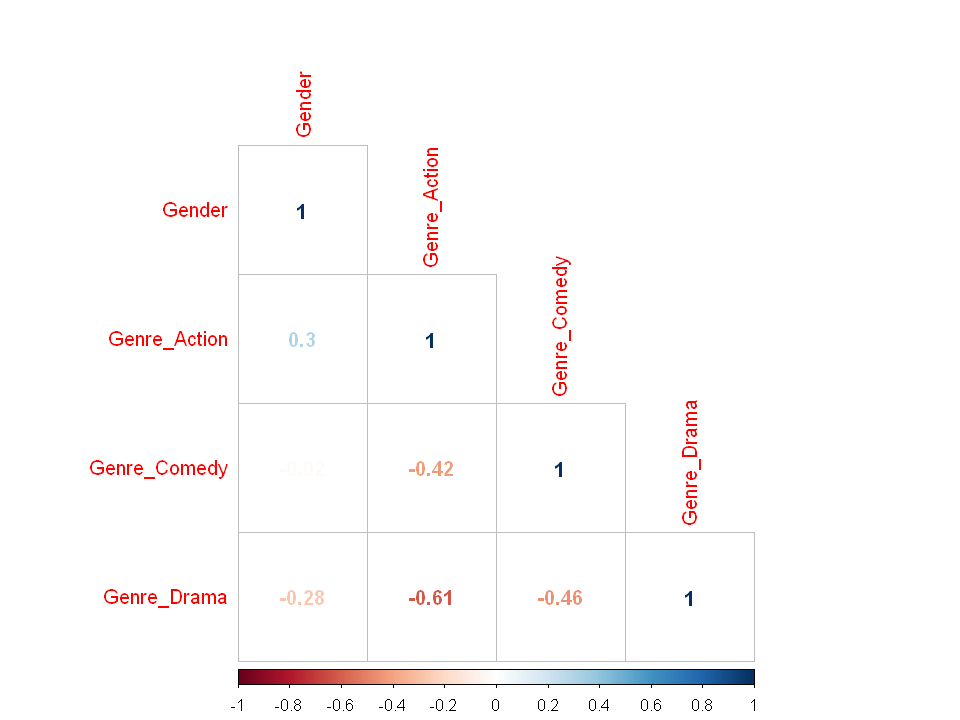

In [259]:
# Correlation Plot complete data set
video.df2.sub2 = select(video.df2,Gender,Genre_Action,Genre_Comedy,Genre_Drama)
# Correlation Plot complete data set
if(!require(corrplot)){install.packages("corrplot")}
options(repr.plot.height = 6, repr.plot.width = 8)
c.plot = cor(video.df2.sub2, method = 'pearson')
print(c.plot)
c.high = findCorrelation(c.plot,cutoff=0.5)
print(c.high)
colnames(video.df2.sub2[c.high])
corrplot(c.plot, method="number", type='lower')

                Gender_F    Gender_M Genre_Action Genre_Comedy Genre_Drama
Gender_F      1.00000000 -1.00000000   -0.3035763   0.02249606   0.2778312
Gender_M     -1.00000000  1.00000000    0.3035763  -0.02249606  -0.2778312
Genre_Action -0.30357629  0.30357629    1.0000000  -0.42146362  -0.6123724
Genre_Comedy  0.02249606 -0.02249606   -0.4214636   1.00000000  -0.4588315
Genre_Drama   0.27783119 -0.27783119   -0.6123724  -0.45883147   1.0000000
[1] 3 1


[1] "Genre_Action" "Gender_F"

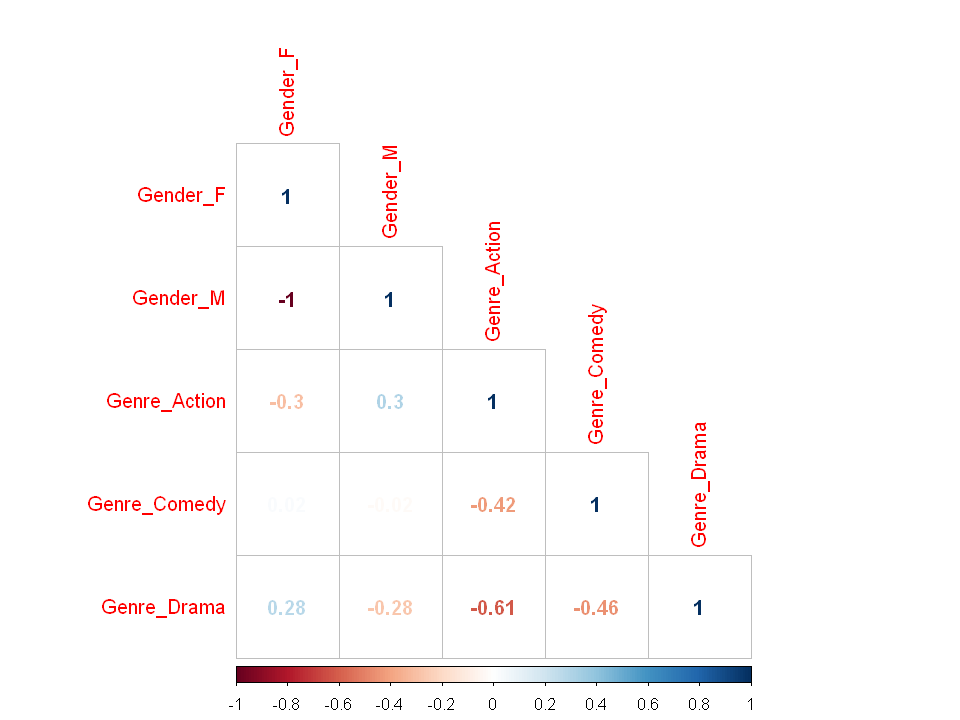

In [260]:
# Use dummies package on all categorical variables, see how that effects things
video.df3.sub1 = select(video.df3,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama)
options(repr.plot.height = 6, repr.plot.width = 8)
c.plot = cor(video.df3.sub1, method = 'pearson')
print(c.plot)
c.high = findCorrelation(c.plot,cutoff=0.5)
print(c.high)
colnames(video.df3.sub1[c.high])
corrplot(c.plot, method="number", type='lower')

### Data Preparation
#### Task H - Select all "good" customers with a high value for the Rentals attribute 
######  (a "good customer is defined as one with a Rentals value of greater than or equal to 30). 
###### Then, create a summary (e.g., using means, medians, and/or other statistics) of the selected data with respect to all other attributes.
##### Question: Can you observe any significant patterns that characterize  this segment of customers? Explain

Note: To know whether your observed patterns in the target group are significant, you need to compare them with the general population using the same metrics.



In [261]:
if(!require(dplyr)){install.packages("dplyr")}
video.df4 = video.df3
video.df3.good.custs = filter(video.df3,Rentals >= 30)
print("#### Good Customers Head data and Summary Statistics ####")
head(video.df3.good.custs)
summary(video.df3.good.custs)
print("#### Bad Customers Head data and Summary Statistics ####")
video.df3.bad.custs = filter(video.df3,Rentals < 30)
head(video.df3.bad.custs)
summary(video.df3.bad.custs)


[1] "#### Good Customers Head data and Summary Statistics ####"


Gender_F,Gender_M,Income,Age,Rentals,Avg.Per.Visit,Incidentals_No,Incidentals_Yes,Genre_Action,Genre_Comedy,Genre_Drama
1,0,2000,15,30,2.5,1,0,0,1,0
1,0,6000,16,39,1.8,0,1,1,0,0
1,0,15000,18,37,2.1,0,1,1,0,0
0,1,17000,19,32,1.8,1,0,1,0,0
1,0,32000,20,42,1.6,1,0,0,1,0
0,1,18000,20,33,1.7,1,0,1,0,0


    Gender_F         Gender_M          Income           Age       
 Min.   :0.0000   Min.   :0.0000   Min.   : 2000   Min.   :15.00  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:19500   1st Qu.:20.00  
 Median :1.0000   Median :0.0000   Median :31500   Median :23.50  
 Mean   :0.5556   Mean   :0.4444   Mean   :37667   Mean   :25.17  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:56000   3rd Qu.:28.75  
 Max.   :1.0000   Max.   :1.0000   Max.   :74000   Max.   :47.00  
    Rentals      Avg.Per.Visit   Incidentals_No   Incidentals_Yes 
 Min.   :30.00   Min.   :1.600   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:32.25   1st Qu.:2.150   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :36.50   Median :2.550   Median :0.0000   Median :1.0000  
 Mean   :37.28   Mean   :2.778   Mean   :0.4444   Mean   :0.5556  
 3rd Qu.:41.75   3rd Qu.:3.375   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :48.00   Max.   :4.700   Max.   :1.0000   Max.   :1.0000  
  Genre_Action  Genre_Comedy     Genre_Drama    
 Min.   :0.0 

[1] "#### Bad Customers Head data and Summary Statistics ####"


Gender_F,Gender_M,Income,Age,Rentals,Avg.Per.Visit,Incidentals_No,Incidentals_Yes,Genre_Action,Genre_Comedy,Genre_Drama
0,1,12000,16,23,2.2,0,1,1,0,0
0,1,1000,16,25,1.4,0,1,0,1,0
0,1,17000,19,26,2.2,0,1,1,0,0
0,1,38000,21,18,2.1,1,0,0,1,0
1,0,26000,22,29,2.9,0,1,1,0,0
0,1,35000,24,24,1.7,1,0,0,0,1


    Gender_F         Gender_M          Income           Age       
 Min.   :0.0000   Min.   :0.0000   Min.   : 1000   Min.   :16.00  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:31250   1st Qu.:25.00  
 Median :0.0000   Median :1.0000   Median :45000   Median :35.00  
 Mean   :0.4375   Mean   :0.5625   Mean   :44906   Mean   :35.16  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:57000   3rd Qu.:43.50  
 Max.   :1.0000   Max.   :1.0000   Max.   :89000   Max.   :70.00  
    Rentals      Avg.Per.Visit   Incidentals_No Incidentals_Yes
 Min.   : 9.00   Min.   :1.100   Min.   :0.0    Min.   :0.0    
 1st Qu.:16.00   1st Qu.:2.175   1st Qu.:0.0    1st Qu.:0.0    
 Median :20.50   Median :2.900   Median :0.5    Median :0.5    
 Mean   :20.03   Mean   :2.731   Mean   :0.5    Mean   :0.5    
 3rd Qu.:24.25   3rd Qu.:3.325   3rd Qu.:1.0    3rd Qu.:1.0    
 Max.   :29.00   Max.   :4.200   Max.   :1.0    Max.   :1.0    
  Genre_Action     Genre_Comedy     Genre_Drama 
 Min.   :0.0000   Min.   :0.0000  

,Gender_F,Gender_M,Income_High,Income_Low,Income_Mid,Age_BabyBoomer,Age_Child,Age_GenX,Age_Millenial,Age_SilentG,Rentals,Avg.Per.Visit,Incidentals_No,Incidentals_Yes,Genre_Action,Genre_Comedy,Genre_Drama,Is_Good_Cust
23,1,0,0,1,0,0,1,0,0,0,0.37496378,2.5,1,0,0,1,0,1
18,1,0,0,1,0,0,1,0,0,0,1.27248346,1.8,0,1,1,0,0,1
20,0,1,0,1,0,0,1,0,0,0,-0.32310708,2.2,0,1,1,0,0,0
25,0,1,0,1,0,0,1,0,0,0,-0.12365827,1.4,0,1,0,1,0,0
29,1,0,0,1,0,0,0,0,1,0,1.07303464,2.1,0,1,1,0,0,1
16,0,1,0,1,0,0,0,0,1,0,-0.02393386,2.2,0,1,1,0,0,0


[1] "#### Plot Correlationg Matrix for Good Customers ####"


[1] 18

Warning message in cor(good.custs, method = "pearson", use = "complete.obs"):
"the standard deviation is zero"

[1]  4  1 15 13 11  8  7


[1] "Income_Low"     "Gender_F"       "Genre_Drama"    "Genre_Action"  
[5] "Incidentals_No" "Age_GenX"       "Age_Child"

[1] "#### Plot Correlationg Matrix for Bad Customers ####"


[1] 32

Warning message in cor(bad.custs, method = "pearson", use = "complete.obs"):
"the standard deviation is zero"

[1] 13 11  8  1 15  4  3


[1] "Genre_Action"   "Incidentals_No" "Age_GenX"       "Gender_F"      
[5] "Genre_Drama"    "Income_Low"     "Income_High"

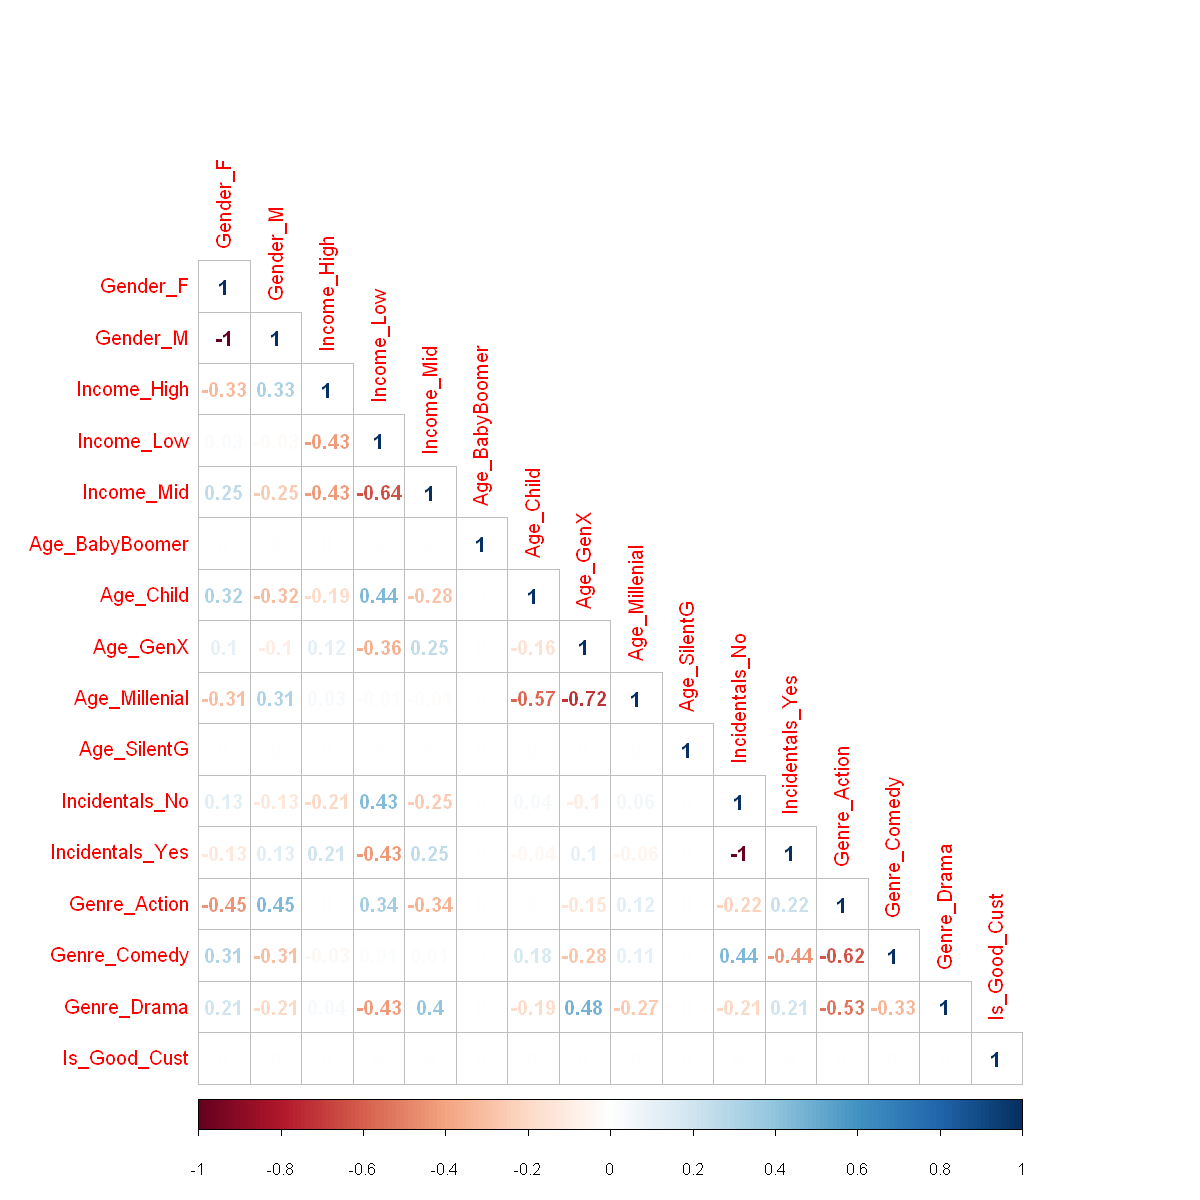

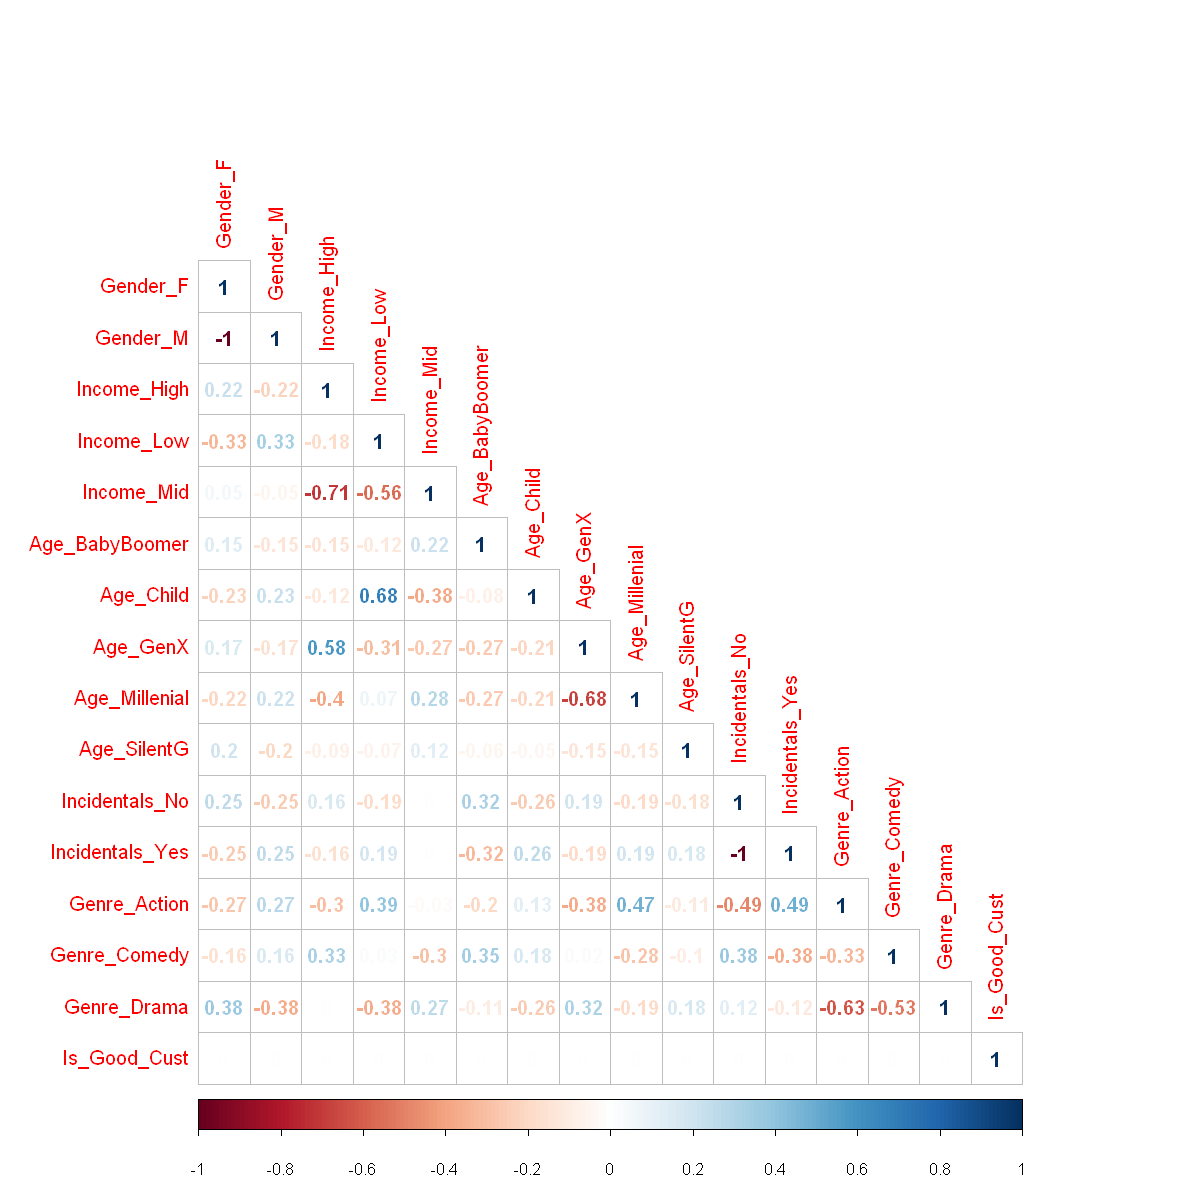

In [262]:
video.df4$Is_Good_Cust = as.integer(ifelse(video.df4$Rentals >= 30,1,0))
video.df4$Age = video.df1$Age.Desc
video.df4$Rentals = video.df1$Rentals
video.df4$Income = video.df1$Income.DISC
video.df4 = dummy.data.frame(video.df4, names = c('Income','Age'), sep="_")
head(video.df4)
video.df4.sub1 = select(video.df4,-Rentals, - Avg.Per.Visit)

print("#### Plot Correlationg Matrix for Good Customers ####")
options(repr.plot.height = 10, repr.plot.width = 10)
good.custs = filter(video.df4.sub1,Is_Good_Cust == 1)
nrow(good.custs)
c.plot1 = cor(good.custs, method = 'pearson', use = 'complete.obs')
c.plot1[is.na(c.plot1)] = as.numeric(0.0001)
#print(c.plot1)
c.high1 = findCorrelation(c.plot1,cutoff=0.5)
print(c.high1)
colnames(video.df4.sub1[c.high1])
corrplot(c.plot1, method="number", type='lower')


print("#### Plot Correlationg Matrix for Bad Customers ####")
options(repr.plot.height = 10, repr.plot.width = 10)
bad.custs = filter(video.df4.sub1,Is_Good_Cust == 0)
nrow(bad.custs)
c.plot2 = cor(bad.custs, method = 'pearson', use = 'complete.obs')
c.plot2[is.na(c.plot2)] = as.numeric(0.0001)
#print(c.plot2)
c.high2 = findCorrelation(c.plot2,cutoff=0.5)
print(c.high2)
colnames(video.df4.sub1[c.high2])
corrplot(c.plot2, method="number", type='lower')

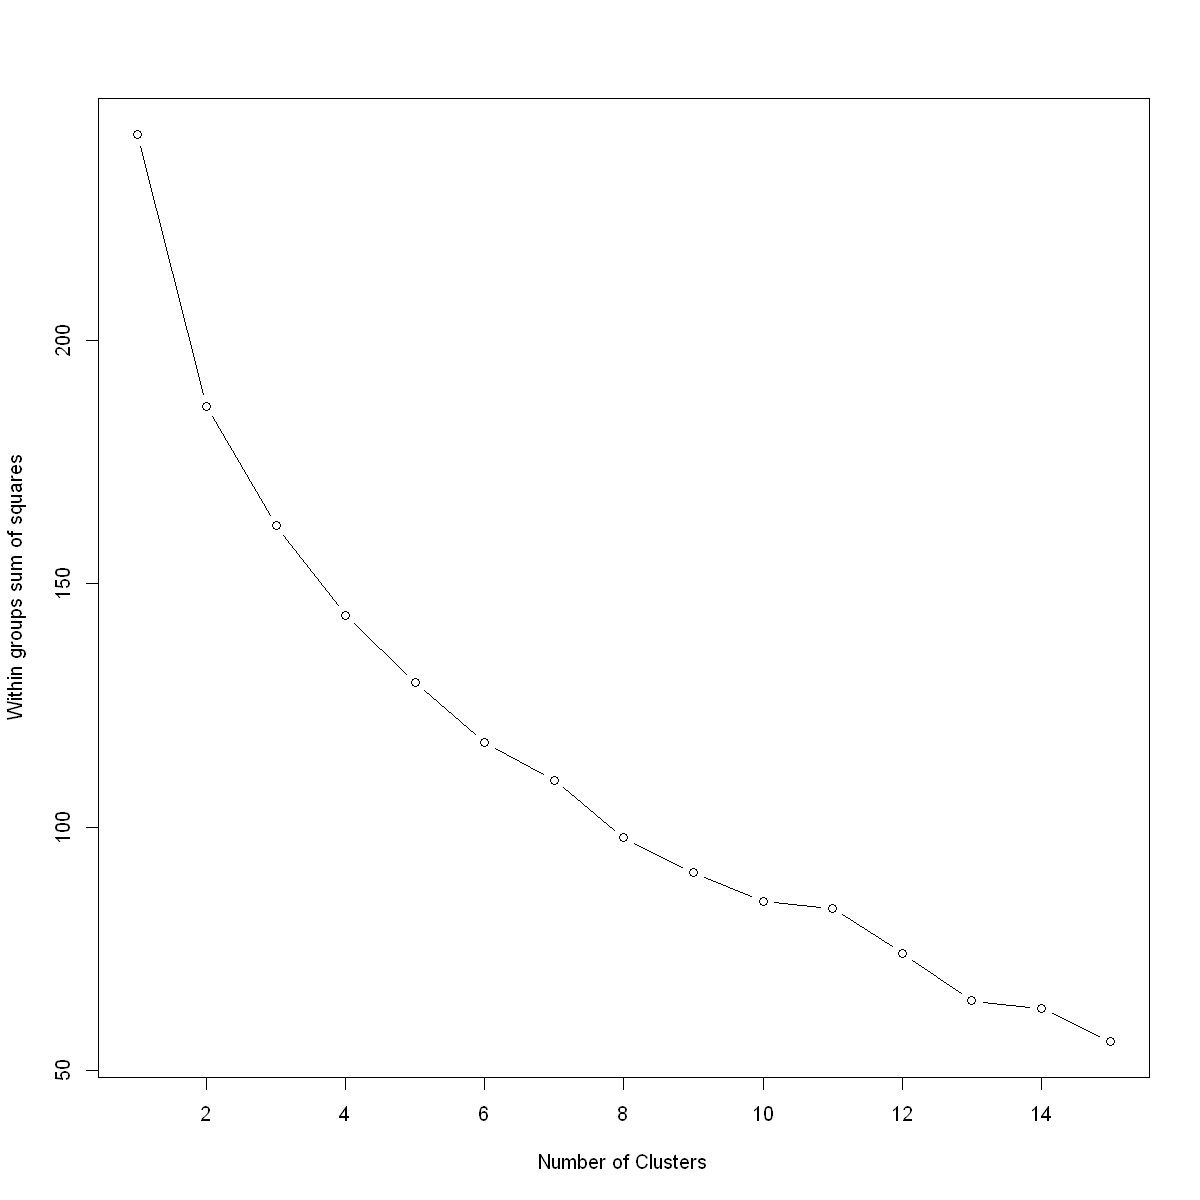

$All.index
      2       3       4       5       6       7       8       9      10 
-1.1528 -1.8476 -2.5601 -2.7377 -3.1207 -3.6444 -3.7543 -3.8184 -4.0062 

$All.CriticalValues
     2      3      4      5      6      7      8      9     10 
0.7114 0.7382 0.2062 0.4171 0.5721 0.1664 0.1259 0.2509 0.1979 

$Best.nc
Number_clusters     Value_Index 
         2.0000         -1.1528 

$Best.partition
23 18 20 25 29 16 40  3  6 50  9 36 11 12 44  1  8 19 30 33 42 49 43 35 15 32 
 1  1  2  2  1  2  2  1  2  1  2  1  1  2  2  2  1  1  2  2  2  1  1  1  1  2 
34  2 22 41  5 17 24 26 39 47 14 38 45 10 46  7 13 37 27 48 21 28 31  4 
 2  2  2  2  2  2  2  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2

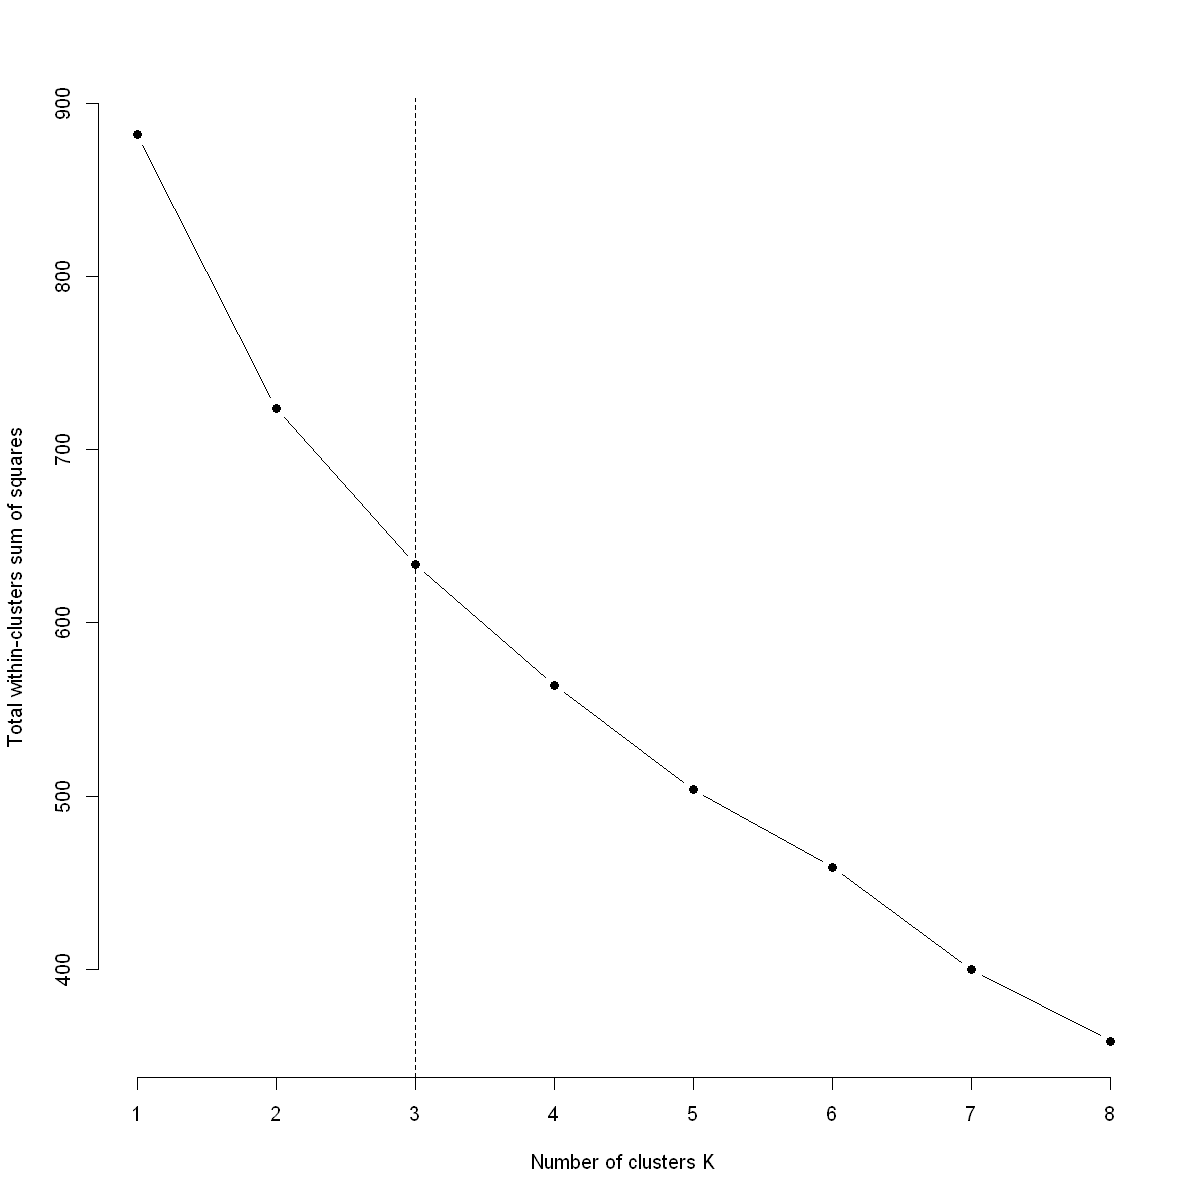

In [263]:

# Perform K-Means Clustering
if(!require(factoextra)){install.packages("factoextra")}
#Determine number of clusters
wss = (nrow(video.df4)-1)*sum(apply(video.df4,2,var))
for(i in 2:15) wss[i] = sum(kmeans(video.df4,centers=i)$withinss)
plot(1:15,wss,type='b',xlab="Number of Clusters", ylab="Within groups sum of squares")

# Scale good customer data frame
video.df4.scaled = scale(video.df4)
    
max.k = 8 #Max number of clusters
df = video.df4.scaled
wss = sapply(1:max.k, function(k){kmeans(video.df4.scaled, k, nstart=10)$tot.withinss})
plot(1:max.k, wss, type="b", pch=19, frame=FALSE, xlab="Number of clusters K", ylab="Total within-clusters sum of squares")
abline(v=3,lty=2)

if(!require(NbClust)){install.packages("NbClust")}
set.seed(766)
nb.clust = NbClust(video.df4, distance='euclidean', min.nc=2, max.nc=10, method="complete", index="gap")
nb.clust
    

Group.1,Gender_F,Gender_M,Income_High,Income_Low,Income_Mid,Age_BabyBoomer,Age_Child,Age_GenX,Age_Millenial,Age_SilentG,Rentals,Avg.Per.Visit,Incidentals_No,Incidentals_Yes,Genre_Action,Genre_Comedy,Genre_Drama,Is_Good_Cust
1,0.7000000,0.3000000,0.3500000,0,0.6500000,0.15,0.0000000,0.5500000,0.3000000,0.00000000,-0.6073216,2.715000,0.9000000,0.1000000,0.0000000,0.40000000,0.6000000,0.1500000
2,0.3636364,0.6363636,0.0000000,1,0.0000000,0.00,0.3636364,0.0000000,0.6363636,0.00000000,0.5290833,2.381818,0.5454545,0.4545455,0.7272727,0.27272727,0.0000000,0.6363636
3,0.3157895,0.6842105,0.1578947,0,0.8421053,0.00,0.0000000,0.2631579,0.6842105,0.05263158,0.3329746,2.994737,0.0000000,1.0000000,0.5263158,0.05263158,0.4210526,0.4210526


,Gender_F,Gender_M,Income_High,Income_Low,Income_Mid,Age_BabyBoomer,Age_Child,Age_GenX,Age_Millenial,Age_SilentG,Rentals,Avg.Per.Visit,Incidentals_No,Incidentals_Yes,Genre_Action,Genre_Comedy,Genre_Drama,Is_Good_Cust,km.scalled.cluster
23,1,0,0,1,0,0,1,0,0,0,0.37496378,2.5,1,0,0,1,0,1,2
18,1,0,0,1,0,0,1,0,0,0,1.27248346,1.8,0,1,1,0,0,1,2
20,0,1,0,1,0,0,1,0,0,0,-0.32310708,2.2,0,1,1,0,0,0,2
25,0,1,0,1,0,0,1,0,0,0,-0.12365827,1.4,0,1,0,1,0,0,2
29,1,0,0,1,0,0,0,0,1,0,1.07303464,2.1,0,1,1,0,0,1,2
16,0,1,0,1,0,0,0,0,1,0,-0.02393386,2.2,0,1,1,0,0,0,2


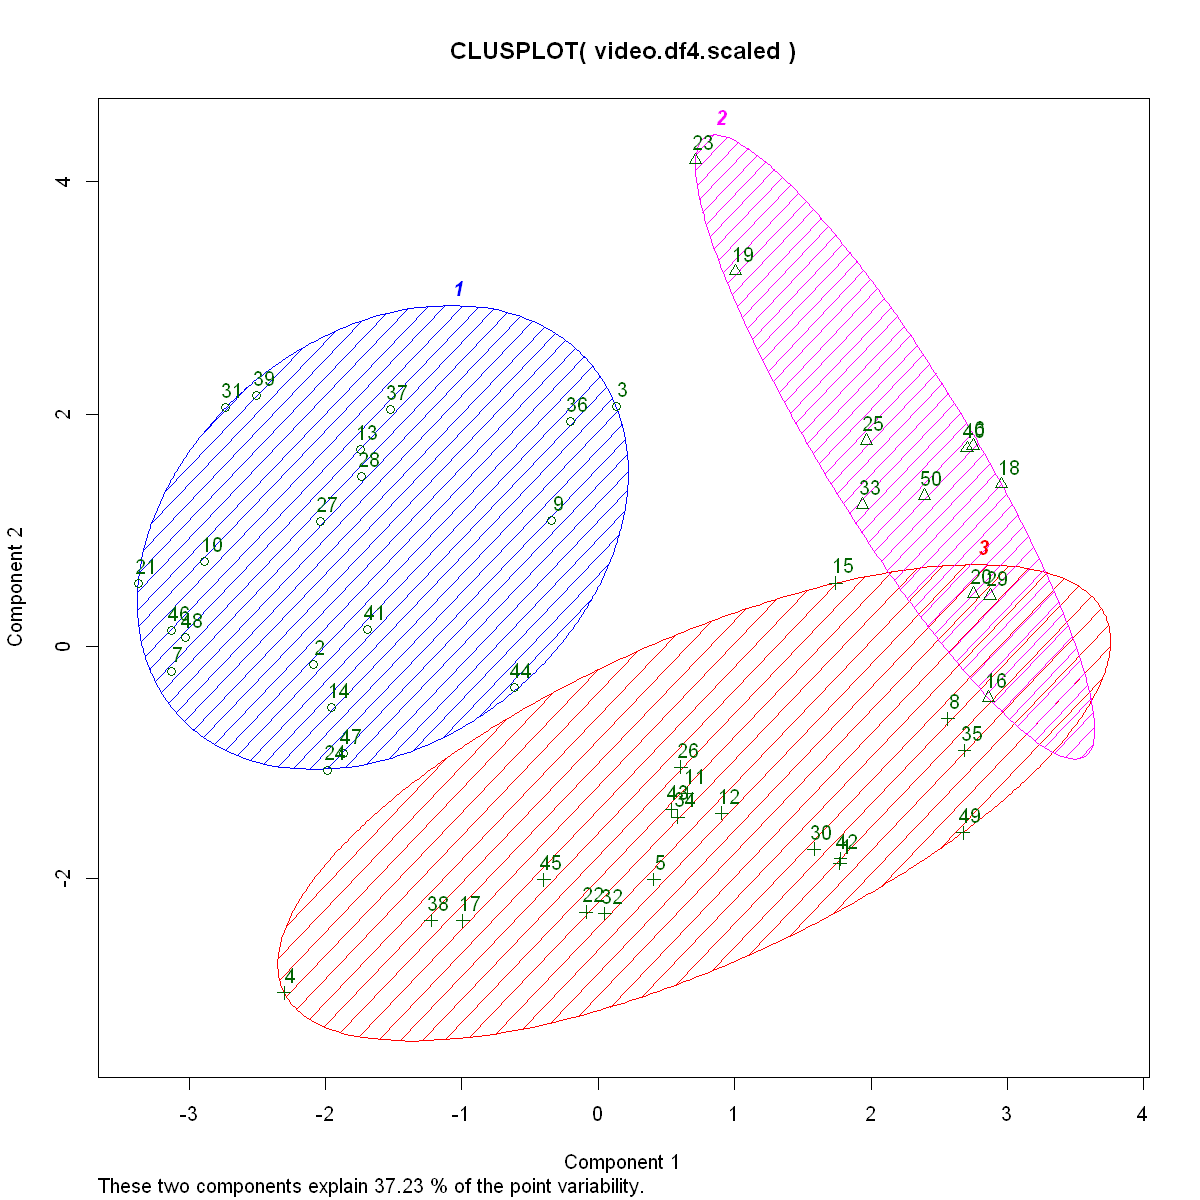

In [264]:

set.seed(777)
km.scalled = kmeans(video.df4.scaled,3,nstart=25)
#km.scalled$cluster
if(!require(cluster)){install.packages("cluster")}
#plot cluster
clusplot(video.df4.scaled,km.scalled$cluster,color=TRUE,shade=TRUE,labels=2,lines=0)

#get cluster means
aggregate(video.df4,by=list(km.scalled$cluster),FUN=mean)
#append cluster assignment
video.df4 = data.frame(video.df4,km.scalled$cluster)
head(video.df4)


In [265]:

df.cluster1 = video.df4[which(video.df4$km.scalled.cluster == 1),]
#nrow(df.cluster1)
#ftable(xtabs(~Incidentals_Yes + Gender_M + Gender_F + Income_High + Income_Mid, data = df.cluster1))
df.c1.summary = summarise(df.cluster1, count = n(), Good_Customers = sum(Is_Good_Cust), Bad_Customers = n()-sum(Is_Good_Cust), Males = sum(Gender_M), Females = sum(Gender_F), High_Incomes = sum(Income_High), Mid_Incomes = sum(Income_Mid), Low_Incomes = sum(Income_Low), BabyBoomers = sum(Age_BabyBoomer), 
          Children = sum(Age_Child), GenXs = sum(Age_GenX), Millenials = sum(Age_Millenial), Rentals_Mean = mean(Rentals), Avg_Per_Visit = mean(Avg.Per.Visit), Incidentals_Yes = sum(Incidentals_Yes),
          Incidentals_No = sum(Incidentals_No), Genre_Actions = sum(Genre_Action), Genre_Comedys = sum(Genre_Comedy), Genre_Dramas = sum(Genre_Drama))
#df.c1.summary
df.cluster2 = video.df4[which(video.df4$km.scalled.cluster == 2),]
#nrow(df.cluster2)
df.c2.summary = summarise(df.cluster2, count = n(), Good_Customers = sum(Is_Good_Cust), Bad_Customers = n()-sum(Is_Good_Cust), Males = sum(Gender_M), Females = sum(Gender_F), High_Incomes = sum(Income_High), Mid_Incomes = sum(Income_Mid), Low_Incomes = sum(Income_Low), BabyBoomers = sum(Age_BabyBoomer), 
          Children = sum(Age_Child), GenXs = sum(Age_GenX), Millenials = sum(Age_Millenial), Rentals_Mean = mean(Rentals), Avg_Per_Visit = mean(Avg.Per.Visit), Incidentals_Yes = sum(Incidentals_Yes),
          Incidentals_No = sum(Incidentals_No), Genre_Actions = sum(Genre_Action), Genre_Comedys = sum(Genre_Comedy), Genre_Dramas = sum(Genre_Drama))
#df.c2.summary
df.cluster3 = video.df4[which(video.df4$km.scalled.cluster == 3),]
#nrow(df.cluster3)
df.c3.summary = summarise(df.cluster3, count = n(), Good_Customers = sum(Is_Good_Cust), Bad_Customers = n()-sum(Is_Good_Cust), Males = sum(Gender_M), Females = sum(Gender_F), High_Incomes = sum(Income_High), Mid_Incomes = sum(Income_Mid), Low_Incomes = sum(Income_Low), BabyBoomers = sum(Age_BabyBoomer), 
          Children = sum(Age_Child), GenXs = sum(Age_GenX), Millenials = sum(Age_Millenial), Rentals_Mean = mean(Rentals), Avg_Per_Visit = mean(Avg.Per.Visit), Incidentals_Yes = sum(Incidentals_Yes),
          Incidentals_No = sum(Incidentals_No), Genre_Actions = sum(Genre_Action), Genre_Comedys = sum(Genre_Comedy), Genre_Dramas = sum(Genre_Drama))
#df.c3.summary

summary.cluster.df = rbind.fill(df.c1.summary,df.c2.summary,df.c3.summary)
row.names(summary.cluster.df) = c('Cluster1', 'Cluster2', 'Cluster3')
summary.cluster.df
write.csv(summary.cluster.df, file = "ds_ass4_cluster_analysis.csv", row.names=FALSE)

,count,Good_Customers,Bad_Customers,Males,Females,High_Incomes,Mid_Incomes,Low_Incomes,BabyBoomers,Children,GenXs,Millenials,Rentals_Mean,Avg_Per_Visit,Incidentals_Yes,Incidentals_No,Genre_Actions,Genre_Comedys,Genre_Dramas
Cluster1,20,3,17,6,14,7,13,0,3,0,11,6,-0.6073216,2.715000,2,18,0,8,12
Cluster2,11,7,4,7,4,0,0,11,0,4,0,7,0.5290833,2.381818,5,6,8,3,0
Cluster3,19,8,11,13,6,3,16,0,0,0,5,13,0.3329746,2.994737,19,0,10,1,8


### Data Preparation
#### Task I - Suppose that because of the high profit margin, the store would like to increase the sales of incidentals.
Based on your observations in previous parts discuss how this could be accomplished.
Explain your answer based on your analysis of the data.
Target marketing toward blue collar, mid-income level, millenial males who are either married or in a relationship. Focus on Action movies that are suspencful and cross into the Drama domain.

#### Question: Should customers with specific characteristics be targeted?
Cluster 3 was composed 2/3 of Millenials and 1/3 GenX
Cluster 3 was mostly composed of Mid Income level observations
Cluster 3 has twice as many Male observations then Female

#### Question: Should certain types of movies be preferred?
Cluster 3 had a 100% Incidentals_Yes of it's observations, where Action(10) and Drama(8) Movies were preferred 

In [266]:
normalize <- function(x) { 
  x <- as.matrix(x)
  minAttr=apply(x, 2, min)
  maxAttr=apply(x, 2, max)
  x <- sweep(x, 2, minAttr, FUN="-") 
  x=sweep(x, 2,  maxAttr-minAttr, "/") 
  attr(x, 'normalized:min') = minAttr
  attr(x, 'normalized:max') = maxAttr
  return (x)
}

out.video.df4 = video.df4
n = normalize(out.video.df4$Rentals)
out.video.df4$Rentals = n[0:50,]

n = normalize(out.video.df4$Avg.Per.Visit)
out.video.df4$Avg.Per.Visit = n[0:50,]

# Write CSV in R
write.csv(out.video.df4, file = "ds_ass4_all_numeric.csv",row.names=FALSE)

#parts a - d 
video.df0.plus = video.df0
video.df0.plus$Age.Smooth = video.df1$Age
video.df0.plus$Income.Norm = video.df1$Income
video.df0.plus$Rentals.Z_Score = video.df1$Rentals
video.df0.plus$Income.DISC = video.df1$Income.DISC

write.csv(video.df0.plus, file = "ds_ass4_aTod.csv", row.names=FALSE)